# Time series values for Rjúpnasalir pumpstation

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

In [102]:
df_pressure = pd.read_excel("data/H-KOP-RS-ÞS212.xlsx")
df_pressure.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_pressure.head()



,start_time,value
0,2022-03-13 09:00:00,7.8
1,2022-03-14 23:00:00,7.8
2,2022-03-13 16:00:00,7.8
3,2022-03-08 02:00:00,7.8
4,2022-03-08 03:00:00,7.8


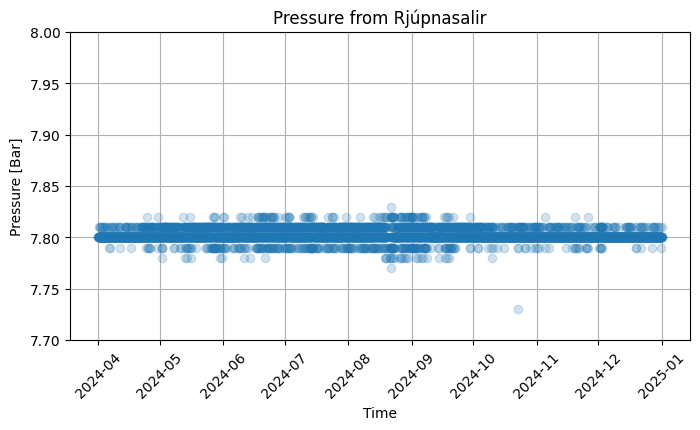

In [103]:
# Convert 'start_time' to datetime format
df_pressure['start_time'] = pd.to_datetime(df_pressure['start_time'], errors='coerce')

# Filter for July 2024
df_filtered = df_pressure[(df_pressure['start_time'].dt.year == 2024) & (df_pressure['start_time'].dt.month > 3)]

# Plot the values with more opacity and no line between them
plt.figure(figsize=(8, 4))
plt.plot(df_filtered['start_time'], df_filtered['value'], marker='o', linestyle='', alpha=0.2)  # Alpha controls opacity
plt.xlabel('Time')
plt.ylabel('Pressure [Bar]')
plt.title('Pressure from Rjúpnasalir')  # Update the title for July
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim([7.7, 8])  # Set y-range from 0 to 100 (adjust as needed)


plt.show()


In [104]:
df_flow = pd.read_excel("data/H-KOP-RS-RS212.xlsx")
df_flow.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_flow.head()

,start_time,value
0,2022-03-13 09:00:00,68.39
1,2022-03-14 23:00:00,64.47
2,2022-03-13 16:00:00,64.36
3,2022-03-08 02:00:00,63.76
4,2022-03-08 03:00:00,62.39


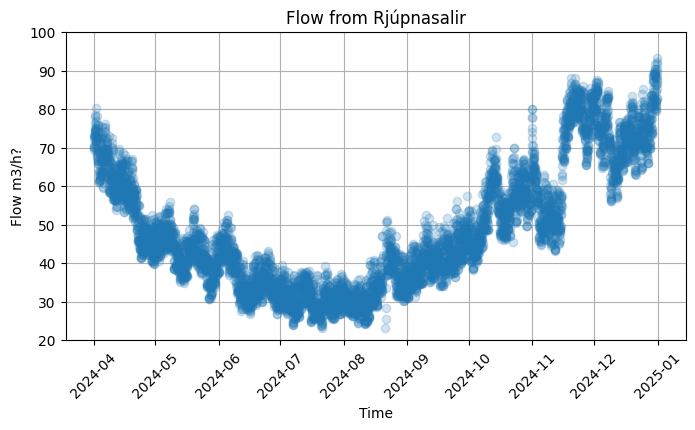

In [105]:
# Convert 'start_time' to datetime format
df_flow['start_time'] = pd.to_datetime(df_flow['start_time'], errors='coerce')

# Filter for July 2024
df_filtered_flow = df_flow[(df_flow['start_time'].dt.year == 2024) & (df_flow['start_time'].dt.month > 3)]

# Plot the values with more opacity and no line between them
plt.figure(figsize=(8, 4))
plt.plot(df_filtered_flow['start_time'], df_filtered_flow['value'], marker='o', linestyle='', alpha=0.2)  # Alpha controls opacity
plt.xlabel('Time')
plt.ylabel('Flow m3/h?')
plt.title('Flow from Rjúpnasalir')  # Update the title for July
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim([20, 100])  # Set y-range from 0 to 100 (adjust as needed)


plt.show()


In [106]:
average_flow = df_filtered_flow['value'].mean()

# Print the average
print(f"The average flow is: {average_flow:.2f} m3/h")

The average flow is: 48.38 m3/h


## Prentum specific dag

In [107]:
# Convert 'start_time' to datetime format
df_flow['start_time'] = pd.to_datetime(df_flow['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
specific_day = "2024-10-03"
df_specific_day = df_flow[df_flow['start_time'].dt.date == pd.to_datetime(specific_day).date()]

# Print the filtered data for that specific day
print(df_specific_day)


               start_time  value
22700 2024-10-03 09:00:00  43.70
22701 2024-10-03 10:00:00  43.18
22702 2024-10-03 11:00:00  43.30
22703 2024-10-03 08:00:00  44.95
22738 2024-10-03 14:00:00  41.49
22739 2024-10-03 12:00:00  43.48
22740 2024-10-03 15:00:00  42.20
22741 2024-10-03 13:00:00  41.76
22836 2024-10-03 06:00:00  41.54
22838 2024-10-03 05:00:00  38.78
22839 2024-10-03 04:00:00  38.50
22840 2024-10-03 01:00:00  38.66
22841 2024-10-03 02:00:00  38.79
22842 2024-10-03 03:00:00  38.32
22843 2024-10-03 07:00:00  48.67
22857 2024-10-03 21:00:00  47.74
22858 2024-10-03 17:00:00  45.34
22859 2024-10-03 23:00:00  44.04
22867 2024-10-03 16:00:00  42.91
22868 2024-10-03 22:00:00  46.19
22869 2024-10-03 18:00:00  48.50
22870 2024-10-03 19:00:00  50.95
22871 2024-10-03 20:00:00  49.64


In [108]:
df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_flow = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_flow  # Normalized demand pattern
df_specific_day

,value,demand_pattern
start_time,,
2024-10-03 01:00:00,38.66,0.886848
2024-10-03 02:00:00,38.79,0.889830
2024-10-03 03:00:00,38.32,0.879048
2024-10-03 04:00:00,38.50,0.883177
2024-10-03 05:00:00,38.78,0.889600
2024-10-03 06:00:00,41.54,0.952914
2024-10-03 07:00:00,48.67,1.116474
2024-10-03 08:00:00,44.95,1.031138
2024-10-03 09:00:00,43.70,1.002464


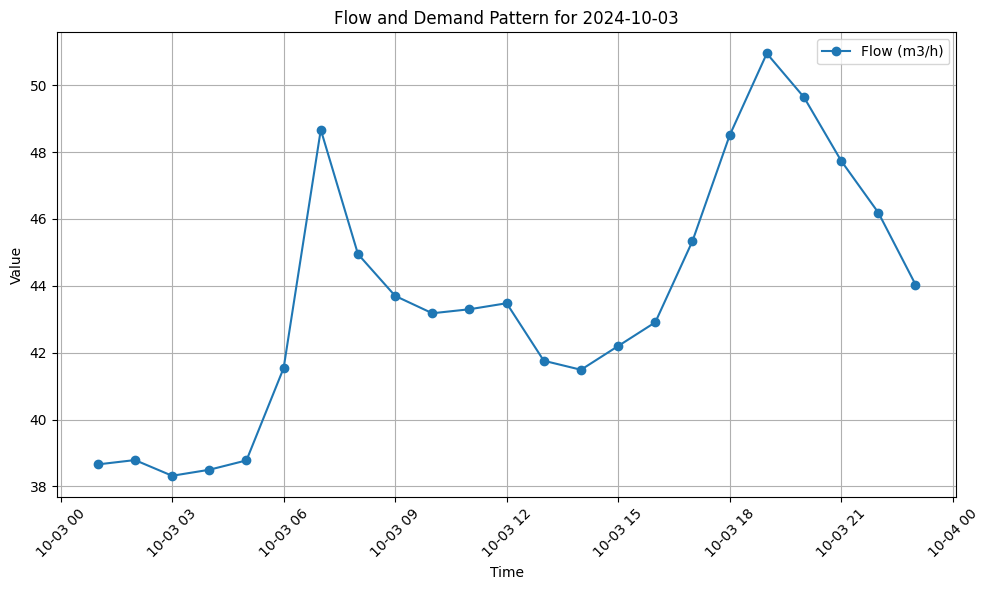

In [ ]:
# Plot the value and demand_pattern columns from df_specific_day
plt.figure(figsize=(10, 6))

# Plot the flow value
plt.plot(df_specific_day.index, df_specific_day['value'], label='Flow (m3/h)', color='tab:blue', marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Flow for 2024-10-03')
plt.xticks(rotation=45)
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [110]:
# Convert 'start_time' to datetime format
df_pressure['start_time'] = pd.to_datetime(df_pressure['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
specific_day = "2024-10-03"
df_specific_day = df_pressure[df_pressure['start_time'].dt.date == pd.to_datetime(specific_day).date()]

# Print the filtered data for that specific day
print(df_specific_day)


               start_time  value
22700 2024-10-03 09:00:00   7.80
22701 2024-10-03 10:00:00   7.80
22702 2024-10-03 11:00:00   7.80
22703 2024-10-03 08:00:00   7.80
22738 2024-10-03 14:00:00   7.80
22739 2024-10-03 12:00:00   7.80
22740 2024-10-03 15:00:00   7.81
22741 2024-10-03 13:00:00   7.80
22836 2024-10-03 06:00:00   7.79
22838 2024-10-03 05:00:00   7.79
22839 2024-10-03 04:00:00   7.81
22840 2024-10-03 01:00:00   7.81
22841 2024-10-03 02:00:00   7.81
22842 2024-10-03 03:00:00   7.80
22843 2024-10-03 07:00:00   7.80
22857 2024-10-03 21:00:00   7.80
22858 2024-10-03 17:00:00   7.80
22859 2024-10-03 23:00:00   7.80
22867 2024-10-03 16:00:00   7.81
22868 2024-10-03 22:00:00   7.80
22869 2024-10-03 18:00:00   7.80
22870 2024-10-03 19:00:00   7.80
22871 2024-10-03 20:00:00   7.80


In [111]:
df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_press = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_press  # Normalized demand pattern
df_specific_day

,value,demand_pattern
start_time,,
2024-10-03 01:00:00,7.81,1.001115
2024-10-03 02:00:00,7.81,1.001115
2024-10-03 03:00:00,7.80,0.999833
2024-10-03 04:00:00,7.81,1.001115
2024-10-03 05:00:00,7.79,0.998551
2024-10-03 06:00:00,7.79,0.998551
2024-10-03 07:00:00,7.80,0.999833
2024-10-03 08:00:00,7.80,0.999833
2024-10-03 09:00:00,7.80,0.999833


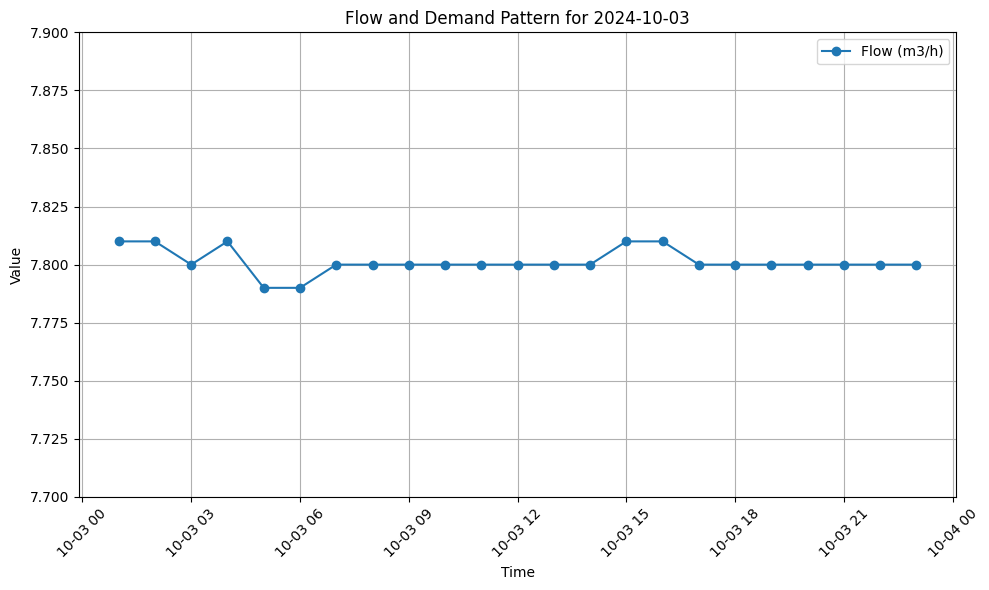

In [112]:
# Plot the value and demand_pattern columns from df_specific_day
plt.figure(figsize=(10, 6))

# Plot the flow value
plt.plot(df_specific_day.index, df_specific_day['value'], label='Flow (m3/h)', color='tab:blue', marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Flow and Demand Pattern for 2024-10-03')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim([7.7 ,7.9])

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()